In [18]:
with open('work_time.log', 'r', encoding='utf-8') as file:
    lines = file.read().splitlines()[8:]
    
triples = map(str.split, lines)
    
import datetime as dt
str_to_date = lambda s: dt.datetime.strptime(s, '%d.%m.%Y').date()

In [19]:
data = [(name, str_to_date(day), int(hours))
       for name, day, hours in triples]

In [20]:
name_errata = {'Alcija': 'Alicja'}

data_dict = {}
for name, date, hours in data:
    name = name_errata.get(name, name)
    if name not in data_dict:
        data_dict[name]= {}
    data_dict[name][date] = hours

In [21]:
from statistics import mean, stdev
import math

stats_dict = {name: {} for name in data_dict}
for name, records in data_dict.items():
    stats_dict[name]['count'] = len(records)
    stats_dict[name]['sum'] = sum(records.values())
    stats_dict[name]['mean'] = mean(records.values())
    stats_dict[name]['stdev'] = stdev(records.values())

stats_dict

{'Dorota': {'count': 25, 'sum': 175, 'mean': 7, 'stdev': 0.0},
 'Błażej': {'count': 30, 'sum': 174, 'mean': 5.8, 'stdev': 1.4239333576037019},
 'Edward': {'count': 21,
  'sum': 40,
  'mean': 1.9047619047619047,
  'stdev': 0.7684244858645451},
 'Cezary': {'count': 18,
  'sum': 157,
  'mean': 8.722222222222221,
  'stdev': 4.884616374310577},
 'Feliks': {'count': 9,
  'sum': 46,
  'mean': 5.111111111111111,
  'stdev': 4.4565806523736455},
 'Alicja': {'count': 21, 'sum': 168, 'mean': 8, 'stdev': 0.0}}

In [42]:
from collections import defaultdict

series = defaultdict(list)
for name, stats in stats_dict.items():
    series['name'].append(name)
    for key, value in stats.items():
        series[key].append(value)
series

defaultdict(list,
            {'name': ['Dorota',
              'Błażej',
              'Edward',
              'Cezary',
              'Feliks',
              'Alicja'],
             'count': [25, 30, 21, 18, 9, 21],
             'sum': [175, 174, 40, 157, 46, 168],
             'mean': [7,
              5.8,
              1.9047619047619047,
              8.722222222222221,
              5.111111111111111,
              8],
             'stdev': [0.0,
              1.4239333576037019,
              0.7684244858645451,
              4.884616374310577,
              4.4565806523736455,
              0.0]})

In [43]:
import pandas as pd

df = pd.DataFrame(series).set_index('name').sort_index()
df

,count,sum,mean,stdev
name,,,,
Alicja,21,168,8.000000,0.000000
Błażej,30,174,5.800000,1.423933
Cezary,18,157,8.722222,4.884616
Dorota,25,175,7.000000,0.000000
Edward,21,40,1.904762,0.768424
Feliks,9,46,5.111111,4.456581


In [44]:
def convert_to_size(series, min_size=100, max_size=5000):
    maximum = max(series)
    normalized = [value / maximum for value in series]
    size_range = max_size - min_size
    return [value * size_range + min_size for value in normalized]

series['size'] = convert_to_size(series['sum'])

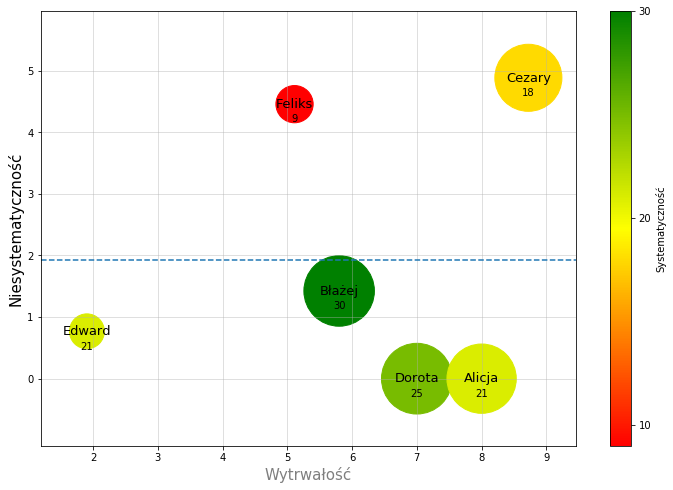

In [86]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt

mymap = LinearSegmentedColormap.from_list('work', ['red', 'yellow', 'green'])

plt.figure(figsize=(12, 8))
plt.scatter(x=series['mean'], y=series['stdev'], 
            c=series['count'], s=series['size'], cmap=mymap);
plt.xlabel('Wytrwałość', size=15, alpha=0.5)
plt.ylabel('Niesystematyczność', size=15)
for x, y, name, c in zip(series['mean'], series['stdev'], series['name'], series['count']):
    plt.annotate(name, xy=(x, y), ha='center', va='center', size=13)
    plt.annotate(str(c), xy=(x, y), xytext=(0, -15), textcoords='offset pixels', ha='center', va='center')
plt.xticks(range(1,11));
plt.yticks(range(7));
plt.margins(0.1, 0.2)
plt.axhline(mean(series['stdev']), linestyle='--')
plt.colorbar(ticks=range(0, 50, 10)).set_label('Systematyczność')
plt.grid(True, alpha=0.5)

plt.savefig('figure.png')